In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!curl -O https://lazyprogrammer.me/course_files/airline_passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2036  100  2036    0     0   1753      0  0:00:01  0:00:01 --:--:--  1759
100  2036  100  2036    0     0   1753      0  0:00:01  0:00:01 --:--:--  1758


In [4]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df['LogPassengers']=np.log(df['Passengers'])

In [7]:
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [8]:
import pmdarima as pm

In [9]:
model=pm.auto_arima(train['Passengers'],
                   trace=True,
                   suppress_warnings=True,
                   seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.07 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.80 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.21 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=5.03 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.60 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.026, Time=6.00 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=1.16 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.86 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.22 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.59 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 29 Oct 2023   AIC                            905.686
Time:                                    16:57:01   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

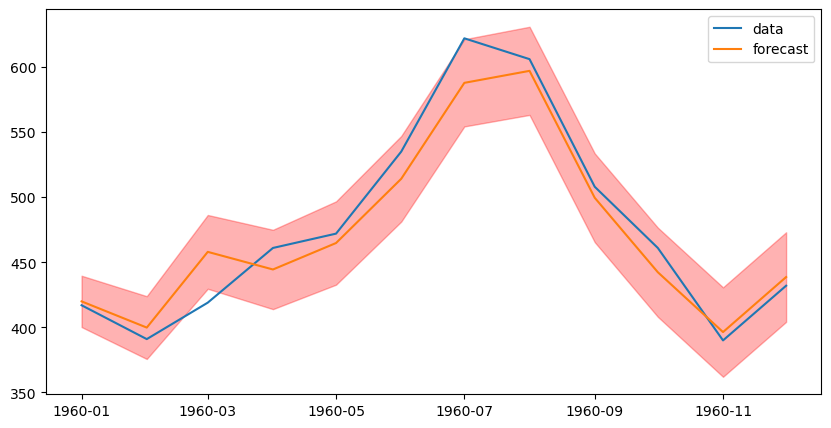

In [12]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(test.index,test['Passengers'],label='data')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,\
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

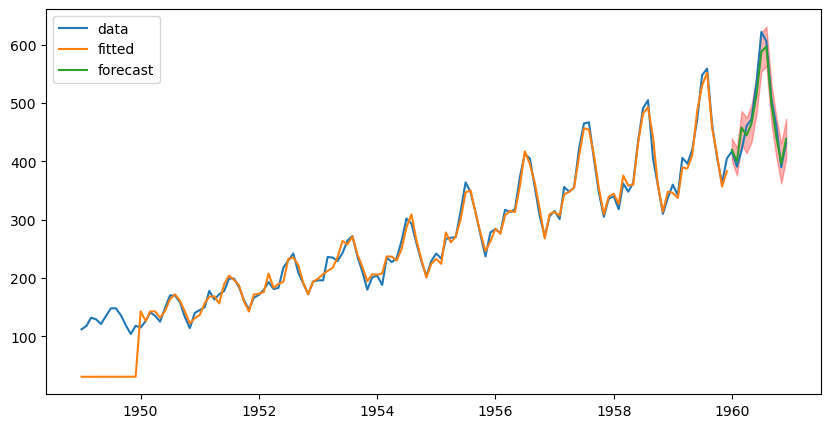

In [13]:
train_pred=model.predict_in_sample(start=0,end=-1)

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.index,df['Passengers'],label='data')
ax.plot(train.index,train_pred,label='fitted')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,\
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

In [14]:
logmodel=pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True,m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.564, Time=2.98 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.57 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=1.59 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.06 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=2.53 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.774, Time=0.99 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.331, Time=5.82 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.707, Time=2.30 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.40 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.573, Time=2.01 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.74 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-442.874, Time=2.56 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.511, Time=4.64 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [15]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Sun, 29 Oct 2023   AIC                           -448.052
Time:                                      17:26:29   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.156      0.031       0.002       0.037
ar.L1          0.5999      0.083      7.263      0.000       0.438       0.762
ar.L2          0.2418      0.085      2.855      0.004       0.076       0.408
ma.S.L12      -0.5668      0.105     -5.411      0.000      -0.772      -0.361
sigma2         0.0012      0.000      8.189      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.10
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

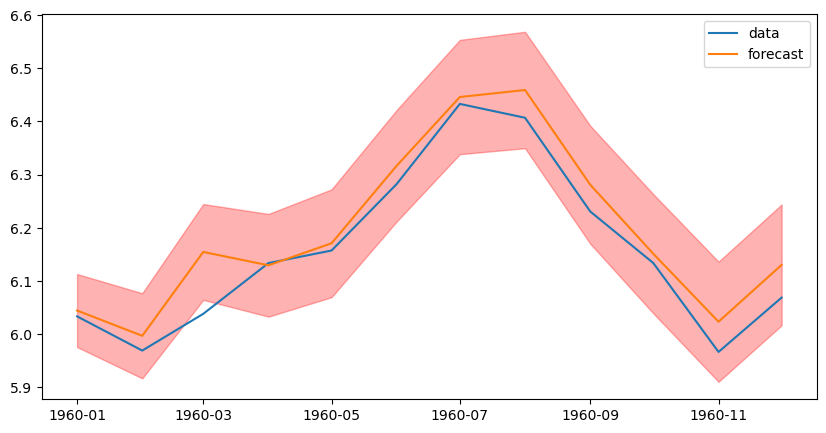

In [17]:
test_pred_log,confint=logmodel.predict(n_periods=Ntest,return_conf_int=True)

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(test.index,test['LogPassengers'],label='data')
ax.plot(test.index,test_pred_log,label='forecast')
ax.fill_between(test.index,\
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

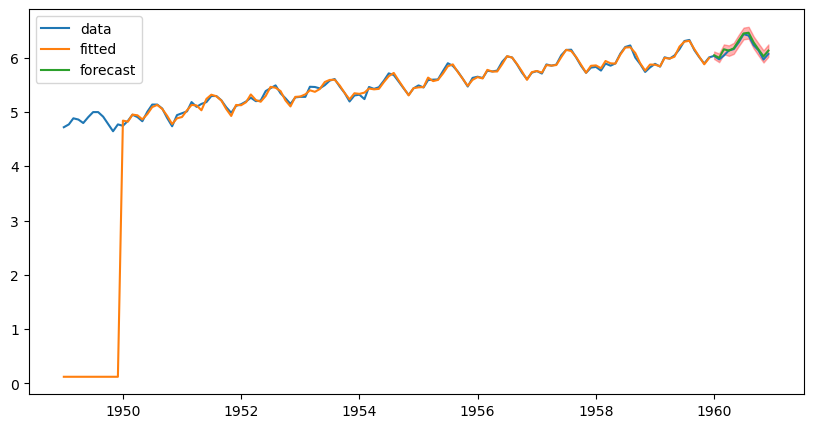

In [18]:
train_pred_log=logmodel.predict_in_sample(start=0,end=-1)

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.index,df['LogPassengers'],label='data')
ax.plot(train.index,train_pred_log,label='fitted')
ax.plot(test.index,test_pred_log,label='forecast')
ax.fill_between(test.index,\
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

In [19]:
### forecast RMSE
def rmse(t,y):
    return np.sqrt(np.mean((t-y)**2))

In [20]:
print('Non-logged RMSE:',rmse(test['Passengers'],test_pred))
print('Logged RMSE:',rmse(test['Passengers'],np.exp(test_pred_log)))

Non-logged RMSE: 18.53646862609228
Logged RMSE: 23.03867023270627


In [21]:
### Non Seasonal
model = pm.auto_arima(train['LogPassengers'],
                     trace=True,
                     suppress_warnings=True,
                     max_p=12,max_q=2,max_order=14,
                     stepwise=True,
                     seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.134, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.299, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-244.365, Time=0.61 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.215, Time=0.83 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.45 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-250.039, Time=0.84 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-227.081, Time=0.80 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-233.612, Time=0.58 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0] interc

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.608
Date:                Sun, 29 Oct 2023   AIC                           -251.215
Time:                        17:42:33   BIC                           -228.213
Sample:                    01-01-1949   HQIC                          -241.868
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0099      0.002      5.229      0.000       0.006       0.014
ar.L1          0.0641      0.128      0.501      0.616      -0.187       0.315
ar.L2          0.4279      0.121      3.529      0.000       0.190       0.666
ar.L3         -0.2243      0.100     -2.247      0.025      -0.420      -0.029
ar.L4         -0.2212      0.104     -2.133      0.033      -0.424      -0.018
ma.L1         -0.0623      0.088     -0.712      0.477      -0.234       0.109
ma.L2         -0.8507      0.087     -9.807      0.000      -1.021      -0.681
sigma2         0.0074      0.001      5.547      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.87
Prob(Q):                              0.94   Prob(JB):                         0.05
Heteroskedasticity (H):               1.04   Skew:                             0.20
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

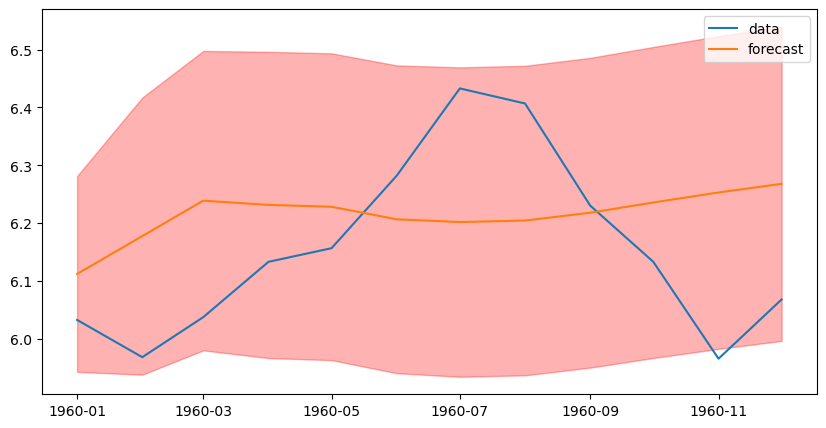

In [24]:
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(test.index,test['LogPassengers'],label='data')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,\
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

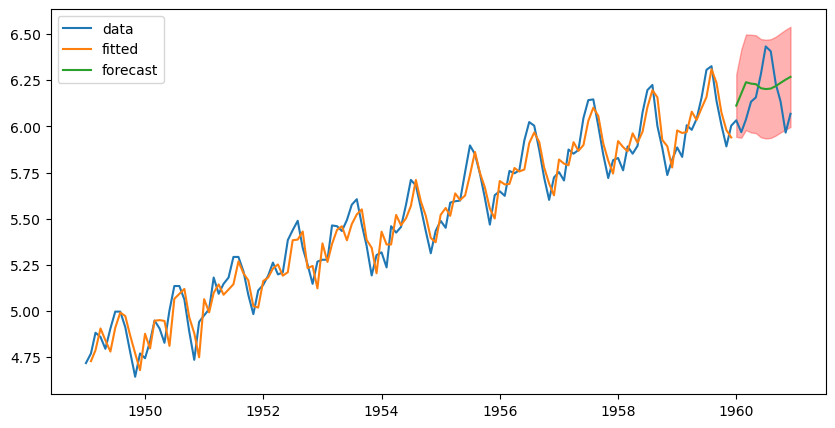

In [25]:
train_pred=model.predict_in_sample(start=1,end=-1)

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.index,df['LogPassengers'],label='data')
ax.plot(train.index[1:],train_pred,label='fitted')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,\
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

In [26]:
rmse(test['Passengers'],np.exp(test_pred))

81.84042402677431